In [ ]:
## Plot conservation, avg cost, and abundance for Thiamine pathway enzymes in a heatmap

In [ ]:
import os
import pandas as pd
import diverse_yeast_tools as dyt
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import diverse_yeast_tools as dyt

base_dir = dyt.base_dir


In [151]:
#Load thiamine pathway genes
thiamine_pway = pd.read_csv(base_dir + os.sep + os.path.normpath('examples/thiamine/thiamine_pathway_base.csv'))


In [152]:
#Add og names

model_og_lookup = dyt.load_model_og_lookup()
thia_og_list = []
for gene_id in thiamine_pway['gene_id']: 
    if gene_id in model_og_lookup['Scer'].keys():
        thia_og_list.append(model_og_lookup['Scer'][gene_id])
    else: 
        thia_og_list.append(None)
        
thiamine_pway['og'] = thia_og_list

#Look up PDB id of gene

gene_id_2_uniprot_id = dyt.load_model_gene_id_2_swissprot_id()

uniprot_ids = []

for gene_id in thiamine_pway['gene_id']: 
    uniprot_ids.append(gene_id_2_swissprot_id['Scer'][gene_id])

thiamine_pway['uniprot_id'] = uniprot_ids
    
#Look up whether gene exists in dataset and cluster
cluster_gene_lists_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/clustering/cluster_sequence_list_initial.json')

with open(cluster_gene_lists_fname, 'r') as f:
    cluster_gene_lists = json.load(f) 
    
#Look up pdb name, cluster id and og_ref name that represents the cluster
cluster_pdb_lists_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/clustering/cluster_sequence_list_initial.json')

with open(cluster_pdb_lists_fname, 'r') as f:
    cluster_pdb_lists = json.load(f) 
    
pdb_fname_lookup = {}
cluster_lookup = {}

for cluster, pdb_list in cluster_pdb_lists.items(): 
    for pdb in pdb_list: 
        if pdb.split('_')[0]=='REF':  #REF indicates it is from the reference species S. cerevisiae
            uniprot_id = pdb.split('_')[2].split('-')[1]
            pdb_fname_lookup[uniprot_id] = pdb
            cluster_lookup[pdb] = cluster


#Make a dictionary that maps Nir's clusters to the representative cluster
#This may only work for ben's og_refs = Oliver's are a bit different as he didn't filter out short sequences or small orthogroups
cluster_mapping = pd.read_csv(base_dir + os.sep + ('msas/structural/tm_align/clustering/cluster_mapping.csv'))
cluster_mapping_reps = cluster_mapping[cluster_mapping['cluster_rep']==1]
og_ref_lookup_by_cluster = dict(zip(cluster_mapping_reps['og_clust'], cluster_mapping_reps['primary_id']))

cluster_ids = []
pdb_fnames = []
og_refs = []

for uniprot_id in thiamine_pway['uniprot_id']:
    if uniprot_id in pdb_fname_lookup.keys():
        pdb_fname = pdb_fname_lookup[uniprot_id]
        pdb_fnames.append(pdb_fname)
        
        cluster_id = cluster_lookup[pdb_fname]
        cluster_ids.append(cluster_id)
        
        og_refs.append(og_ref_lookup_by_cluster[cluster_id])
        
    else:
        cluster_ids.append(None)
        pdb_fnames.append(None)
        og_refs.append(None)

thiamine_pway['cluster_id'] = cluster_ids
thiamine_pway['pdb_fname'] = pdb_fnames
thiamine_pway['og_ref'] = og_refs

In [153]:
thiamine_pway

,gene_name,gene_id,enzymes,paralogs,og,uniprot_id,cluster_id,pdb_fname,og_ref
0,THI13,YDL244W,['hydroxymethylpyrimidine_synthase'],"['THI5','THI11','THI12']",OG5096,Q07748,OG5096_C1,REF_Scer_AF-Q07748-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2
1,THI5,YFL058W,[hydroxymethylpyrimidine_synthase],"['THI13','THI11','THI12']",OG5096,P43534,OG5096_C1,REF_Scer_AF-P43534-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2
2,THI11,YJR156C,[hydroxymethylpyrimidine_synthase],"['THI5','THI13','THI12']",OG5096,P47183,OG5096_C1,REF_Scer_AF-P47183-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2
3,THI12,YNL332W,[hydroxymethylpyrimidine_synthase],"['THI5','THI11','THI13']",OG5096,P42883,OG5096_C1,REF_Scer_AF-P42883-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2
4,THI21,YPL258C,"['hydroxymethylpyrimidine_kinase','hydroxymeth...",['THI20'],OG3811,Q08975,OG3811_C1,REF_Scer_AF-Q08975-F1-model_v2.pdb,OG3811_REF_Scer_AF-Q06490-F1-model_v2
5,THI20,YOL055C,"['hydroxymethylpyrimidine_kinase','hydroxymeth...",['THI21'],OG3811,Q08224,OG3811_C1,REF_Scer_AF-Q08224-F1-model_v2.pdb,OG3811_REF_Scer_AF-Q06490-F1-model_v2
6,THI4,YGR144W,['thiazole_synthase'],NaN,None,P32318,None,None,None
7,THI6,YPL214C,['TMP_diphosphorylase'],NaN,OG3581,P41835,OG3581_C1,REF_Scer_AF-P41835-F1-model_v2.pdb,OG3581_REF_Scer_AF-P41835-F1-model_v2
8,THI80,YOR143C,['thiamine_pyrophosphokinase'],NaN,OG3114,P35202,OG3114_C1,REF_Scer_AF-P35202-F1-model_v2.pdb,OG3114_REF_Scer_AF-P35202-F1-model_v2


In [154]:
# Add conservation, abundance, and cost

output_data = {'Conservation Ratio': 
                   {'col_name':'Mean(Conservation Rate) [ALL]',
                    'input_data_fname': 'Scores_Mapped.tsv'
                    }, 
               'Abundance': 
                   {'col_name':'Mean(log2(Abundances)) 10 Sp [EXP]',
                    'input_data_fname': 'Scores_Experimental.tsv'
                    }, 
               'Cost': 
                   {'col_name': 'Mean(Mean(Costs(mean(normalized)))) [FULL]',
                    'input_data_fname': 'Scores_Full.tsv'
                    }, 
              }



for data_to_merge, metadata in output_data.items(): 
    input_data_full = pd.read_table(base_dir + os.sep + os.path.normpath('Output/Matrices/' + metadata['input_data_fname']), index_col = 0)
    input_data_subset = input_data_full.loc[:,metadata['col_name']]
    
    thiamine_pway = thiamine_pway.merge(input_data_subset, how='left', left_on = 'og_ref', right_index = True)
     
    min_input = min(input_data_subset)
    max_input = max(input_data_subset)
    
    input_mean = np.mean(input_data_subset)
    input_std = np.std(input_data_subset)
    
    thiamine_pway['Min Max Normalized ' + data_to_merge] = (thiamine_pway[metadata['col_name']]-min_input)/(max_input-min_input)
    thiamine_pway['Z score ' + data_to_merge] = (thiamine_pway[metadata['col_name']]-input_mean)/input_std
    
    metadata['min'] = min_input
    metadata['max'] = max_input
    metadata['mean'] = input_mean
    metadata['std'] = input_std
    
    output_data[data_to_merge] = metadata

thiamine_pway = thiamine_pway.set_index('gene_name')


In [157]:
thiamine_pway = thiamine_pway.set_index('gene_name')

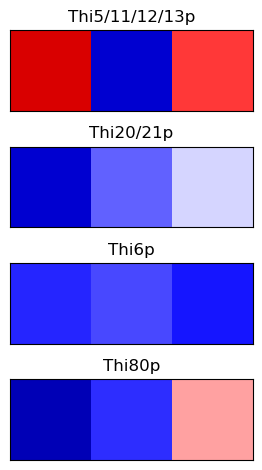

In [173]:
fig, axarr = plt.subplots(4,1)

enzymes_to_view = {'THI5': 'Thi5/11/12/13p', 
                   'THI20': 'Thi20/21p',
                   'THI6': 'Thi6p',
                   'THI80': 'Thi80p'
                  }

vmin = -2.5
vmax = 2.5

columns_to_view = ['Z score ' + output_data_name for output_data_name in output_data.keys()]

for jj,(rep_enzyme, label) in enumerate(enzymes_to_view.items()):
    ax = axarr[jj]
    
    enzyme_data = np.array(thiamine_pway.loc[[rep_enzyme], columns_to_view])

    im = ax.imshow(enzyme_data, cmap = 'seismic',vmin = vmin, vmax = vmax)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)


fig.tight_layout()

fig.savefig(base_dir + os.sep + os.path.normpath('examples/thiamine/thiamine_pathway_heatmaps.svg'))

In [53]:
#dn_ds values for thiamine pathway
#struct_data_dnds = pd.read_csv(base_dir + os.sep + os.path.normpath('selection_calculations/m0/m0_dS_filter_20231128.csv'), index_col=0)

In [169]:
output_data

{'Conservation Ratio': {'col_name': 'Mean(Conservation Rate) [ALL]',
  'input_data_fname': 'Scores_Mapped.tsv',
  'min': 0.2450980392156862,
  'max': 0.89179594654521,
  'mean': 0.626367441788501,
  'std': 0.11062739195935986},
 'Abundance': {'col_name': 'Mean(log2(Abundances)) 10 Sp [EXP]',
  'input_data_fname': 'Scores_Experimental.tsv',
  'min': 10.689997971419446,
  'max': 20.54400501950149,
  'mean': 14.719934898028425,
  'std': 1.9443044371626157},
 'Cost': {'col_name': 'Mean(Mean(Costs(mean(normalized)))) [FULL]',
  'input_data_fname': 'Scores_Full.tsv',
  'min': 0.2249517388617838,
  'max': 0.3254449396551107,
  'mean': 0.2699192392112208,
  'std': 0.01586893365289119}}

In [168]:
thiamine_pway = base_dir + os.sep + os.path.normpath('examples/thiamine/thiamine_pathway_base.csv')

,gene_id,enzymes,paralogs,og,uniprot_id,cluster_id,pdb_fname,og_ref,Mean(Conservation Rate) [ALL],Min Max Normalized Conservation Ratio,Z score Conservation Ratio,Mean(log2(Abundances)) 10 Sp [EXP],Min Max Normalized Abundance,Z score Abundance,Mean(Mean(Costs(mean(normalized)))) [FULL],Min Max Normalized Cost,Z score Cost
gene_name,,,,,,,,,,,,,,,,,
THI13,YDL244W,['hydroxymethylpyrimidine_synthase'],"['THI5','THI11','THI12']",OG5096,Q07748,OG5096_C1,REF_Scer_AF-Q07748-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2,0.804829,0.865522,1.613179,11.672408,0.099696,-1.567413,0.285171,0.599235,0.961097
THI5,YFL058W,[hydroxymethylpyrimidine_synthase],"['THI13','THI11','THI12']",OG5096,P43534,OG5096_C1,REF_Scer_AF-P43534-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2,0.804829,0.865522,1.613179,11.672408,0.099696,-1.567413,0.285171,0.599235,0.961097
THI11,YJR156C,[hydroxymethylpyrimidine_synthase],"['THI5','THI13','THI12']",OG5096,P47183,OG5096_C1,REF_Scer_AF-P47183-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2,0.804829,0.865522,1.613179,11.672408,0.099696,-1.567413,0.285171,0.599235,0.961097
THI12,YNL332W,[hydroxymethylpyrimidine_synthase],"['THI5','THI11','THI13']",OG5096,P42883,OG5096_C1,REF_Scer_AF-P42883-F1-model_v2.pdb,OG5096_REF_Scer_AF-P42883-F1-model_v2,0.804829,0.865522,1.613179,11.672408,0.099696,-1.567413,0.285171,0.599235,0.961097
THI21,YPL258C,"['hydroxymethylpyrimidine_kinase','hydroxymeth...",['THI20'],OG3811,Q08975,OG3811_C1,REF_Scer_AF-Q08975-F1-model_v2.pdb,OG3811_REF_Scer_AF-Q06490-F1-model_v2,0.452290,0.320385,-1.573543,13.235023,0.258273,-0.763724,0.266681,0.415243,-0.204071
THI20,YOL055C,"['hydroxymethylpyrimidine_kinase','hydroxymeth...",['THI21'],OG3811,Q08224,OG3811_C1,REF_Scer_AF-Q08224-F1-model_v2.pdb,OG3811_REF_Scer_AF-Q06490-F1-model_v2,0.452290,0.320385,-1.573543,13.235023,0.258273,-0.763724,0.266681,0.415243,-0.204071
THI4,YGR144W,['thiazole_synthase'],NaN,None,P32318,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
THI6,YPL214C,['TMP_diphosphorylase'],NaN,OG3581,P41835,OG3581_C1,REF_Scer_AF-P41835-F1-model_v2.pdb,OG3581_REF_Scer_AF-P41835-F1-model_v2,0.508013,0.406550,-1.069844,12.983409,0.232739,-0.893135,0.251869,0.267851,-1.137459
THI80,YOR143C,['thiamine_pyrophosphokinase'],NaN,OG3114,P35202,OG3114_C1,REF_Scer_AF-P35202-F1-model_v2.pdb,OG3114_REF_Scer_AF-P35202-F1-model_v2,0.432120,0.289195,-1.755873,12.722068,0.206218,-1.027549,0.277228,0.520199,0.460585


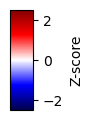

In [186]:
# Make a figure and axes with dimensions as desired.
#fig = plt.figure(figsize=(3, 8))
#ax = fig.add_axes([0.05, 0.05, 0.8, 0.8])
fig, ax = plt.subplots(1,1, figsize=(0.3, 1.3))

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.seismic
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Z-score')

fig.savefig(base_dir + os.sep + os.path.normpath('examples/thiamine/thiamine_pathway_colorbar.svg'))